# Atividade Prática 3

## 2. Regressão

Carrega a biblioteca ANFIS:

In [1]:
from matplotlib import pyplot as plt
import sys
import itertools
import numpy as np
import pandas as pd
from scipy.io import loadmat  # this is the SciPy module that loads mat-files

import torch
from torch.utils.data import TensorDataset, DataLoader

import anfis
from membership import GaussMembFunc, make_gauss_mfs
from experimental import train_anfis, test_anfis
from matplotlib import pyplot as plt
import sys
import itertools
import numpy as np

import torch
from torch.utils.data import TensorDataset, DataLoader

import anfis
from membership import BellMembFunc, make_bell_mfs
from experimental import train_anfis, test_anfis

dtype = torch.float

Seguindo a metodologia como nos exemplos do repositório, define-se a função geradora e os parâmetros do modelo.

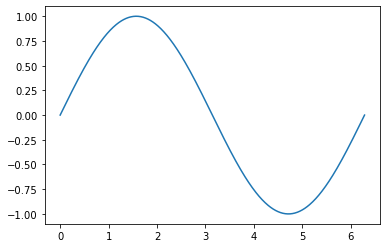

### Training for 20 epochs, training size = 500 cases
epoch    0: MSE=0.00052, RMSE=0.02286 =inf%
epoch    1: MSE=0.00052, RMSE=0.02286 =inf%
epoch    2: MSE=0.00052, RMSE=0.02285 =inf%
epoch    3: MSE=0.00052, RMSE=0.02284 =inf%
epoch    4: MSE=0.00052, RMSE=0.02283 =inf%
epoch    5: MSE=0.00052, RMSE=0.02281 =inf%
epoch    6: MSE=0.00052, RMSE=0.02279 =inf%
epoch    7: MSE=0.00052, RMSE=0.02277 =inf%
epoch    8: MSE=0.00052, RMSE=0.02275 =inf%
epoch    9: MSE=0.00052, RMSE=0.02273 =inf%
epoch   10: MSE=0.00052, RMSE=0.02270 =inf%
epoch   11: MSE=0.00051, RMSE=0.02267 =inf%
epoch   12: MSE=0.00051, RMSE=0.02264 =inf%
epoch   13: MSE=0.00051, RMSE=0.02261 =inf%
epoch   14: MSE=0.00051, RMSE=0.02258 =inf%
epoch   15: MSE=0.00051, RMSE=0.02255 =inf%
epoch   16: MSE=0.00051, RMSE=0.02251 =inf%
epoch   17: MSE=0.00051, RMSE=0.02248 =inf%
epoch   18: MSE=0.00050, RMSE=0.02244 =inf%
epoch   19: MSE=0.00050, RMSE=0.02240 =inf%


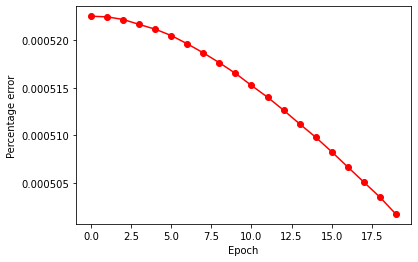

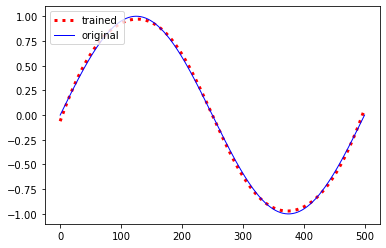

In [2]:
def sin(x):
    return np.sin(x)

def make_sin(batch_size=1024):
    '''
        Gera funcao seno
    '''

    x = torch.linspace(0, 2*np.pi, 500).reshape(-1, 1)
    y = torch.tensor([sin(p) for p in x], dtype=dtype).reshape(-1, 1)

    plt.plot(x, y)
    plt.show()

    td = TensorDataset(x, y)
    return DataLoader(td, batch_size=batch_size, shuffle=True)

def ex1_model():
    '''
        Define modelo e parametros para funcoes de pertinencia
    '''
    invardefs = [
            ('x0', make_bell_mfs(3.33333, 2, list(np.linspace(0, 2*np.pi, 3))))
            ]
    outvars = ['y0']

    anf = anfis.AnfisNet('Aproximacao senoidal', invardefs, outvars)
    return anf

if __name__ == '__main__':
    model = ex1_model()
    train_data = make_sin(batch_size = 100)
    train_anfis(model, train_data, 20, True)
    

Para um exemplo ruidoso, a implementação é análoga.

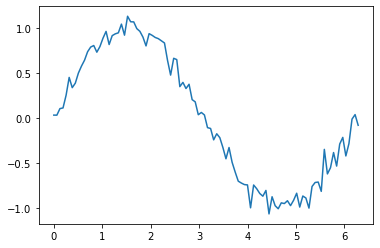

### Training for 20 epochs, training size = 100 cases
epoch    0: MSE=0.00696, RMSE=0.08342 =34.69%
epoch    1: MSE=0.00696, RMSE=0.08342 =34.69%
epoch    2: MSE=0.00696, RMSE=0.08342 =34.69%
epoch    3: MSE=0.00696, RMSE=0.08342 =34.69%
epoch    4: MSE=0.00696, RMSE=0.08342 =34.69%
epoch    5: MSE=0.00696, RMSE=0.08342 =34.69%
epoch    6: MSE=0.00696, RMSE=0.08342 =34.69%
epoch    7: MSE=0.00696, RMSE=0.08342 =34.68%
epoch    8: MSE=0.00696, RMSE=0.08342 =34.68%
epoch    9: MSE=0.00696, RMSE=0.08342 =34.68%
epoch   10: MSE=0.00696, RMSE=0.08342 =34.68%
epoch   11: MSE=0.00696, RMSE=0.08342 =34.68%
epoch   12: MSE=0.00696, RMSE=0.08342 =34.68%
epoch   13: MSE=0.00696, RMSE=0.08342 =34.68%
epoch   14: MSE=0.00696, RMSE=0.08341 =34.68%
epoch   15: MSE=0.00696, RMSE=0.08341 =34.68%
epoch   16: MSE=0.00696, RMSE=0.08341 =34.67%
epoch   17: MSE=0.00696, RMSE=0.08341 =34.67%
epoch   18: MSE=0.00696, RMSE=0.08341 =34.67%
epoch   19: MSE=0.00696, RMSE=0.08341 =34.67%


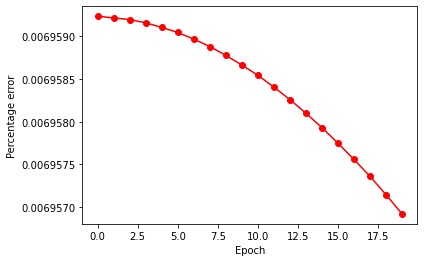

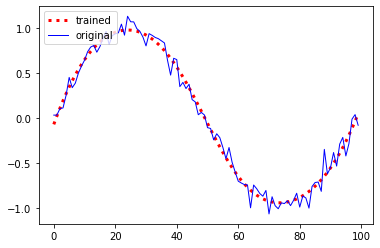

In [3]:
def noisy_sin(x):
    return np.sin(x) + 0.1 * np.random.normal(0, 1, 1)

def make_noisy_sin(batch_size=1024):
    '''
        Gera funcao seno
    '''

    x = torch.linspace(0, 2*np.pi, 100).reshape(-1, 1)
    y = torch.tensor([noisy_sin(p) for p in x], dtype=dtype).reshape(-1, 1)

    plt.plot(x, y)
    plt.show()

    td = TensorDataset(x, y)
    return DataLoader(td, batch_size=batch_size, shuffle=True)

if __name__ == '__main__':
    model = ex1_model()
    train_data = make_noisy_sin(batch_size = 100)
    train_anfis(model, train_data, 20, True)

Note que mesmo com entrada ruidosa, a curva gerada manteve o contorno senoidal.

## 3. Previsão de uma Série Temporal

Define-se inicialmente as rotinas de definição do conjunto de dados. Note que a entrada é separada nos instantes de tempo especificados.

In [4]:
def data(partition):
    '''
        Gera os quatro instantes de dados e saida
    '''
    
    # loading data set
    data = loadmat('mg.mat')
    data = pd.DataFrame(data['x'])
    lendata = len(data)
    
    # 80/20
    data = data.to_numpy()
    limit = int(0.8 * lendata)
    
    if partition == 'train':
        const = limit - 18
        cycle = range(18, limit)
    if partition == 'test':
        const = lendata - limit - 6
        cycle = range(limit, lendata - 6)
    
    # quatro instantes e futuro
    x = torch.zeros((const, 4))
    y = torch.zeros((const, 1))
    for idx, t in enumerate(cycle):
        x[idx, 0] = torch.tensor(data[t - 18])
        x[idx, 1] = torch.tensor(data[t - 12])
        x[idx, 2] = torch.tensor(data[t - 6])
        x[idx, 3] = torch.tensor(data[t - 0])
        y[idx, 0] = torch.tensor(data[t + 6])
    
    td = TensorDataset(x, y)
    return DataLoader(td, batch_size = 1024, shuffle = True)

Agora, o modelo em si.

In [5]:
def model():
    invardefs = [
        # ainda n escolhi os centros e sigma
        ('x(t-18)', make_gauss_mfs(sigma = 0.2, mu_list = [0.4, 1.2])),
        ('x(t-12)', make_gauss_mfs(sigma = 0.2, mu_list = [0.4, 1.2])),
        ('x(t-6)', make_gauss_mfs(sigma = 0.2, mu_list = [0.4, 1.2])),
        ('x(t)', make_gauss_mfs(sigma = 0.2, mu_list = [0.4, 1.2]))
        ]
    outvars = ['ys']
    
    model = anfis.AnfisNet('mackey-glass', invardefs, outvars)
    return model

### Training for 20 epochs, training size = 782 cases
epoch    0: MSE=0.00007, RMSE=0.00827 =0.66%
epoch    1: MSE=0.00007, RMSE=0.00827 =0.66%
epoch    2: MSE=0.00007, RMSE=0.00826 =0.66%
epoch    3: MSE=0.00007, RMSE=0.00825 =0.66%
epoch    4: MSE=0.00007, RMSE=0.00823 =0.66%
epoch    5: MSE=0.00007, RMSE=0.00821 =0.65%
epoch    6: MSE=0.00007, RMSE=0.00819 =0.65%
epoch    7: MSE=0.00007, RMSE=0.00816 =0.65%
epoch    8: MSE=0.00007, RMSE=0.00813 =0.65%
epoch    9: MSE=0.00007, RMSE=0.00810 =0.64%
epoch   10: MSE=0.00007, RMSE=0.00806 =0.64%
epoch   11: MSE=0.00006, RMSE=0.00802 =0.64%
epoch   12: MSE=0.00006, RMSE=0.00798 =0.63%
epoch   13: MSE=0.00006, RMSE=0.00794 =0.63%
epoch   14: MSE=0.00006, RMSE=0.00789 =0.62%
epoch   15: MSE=0.00006, RMSE=0.00783 =0.62%
epoch   16: MSE=0.00006, RMSE=0.00778 =0.62%
epoch   17: MSE=0.00006, RMSE=0.00772 =0.61%
epoch   18: MSE=0.00006, RMSE=0.00766 =0.60%
epoch   19: MSE=0.00006, RMSE=0.00760 =0.60%


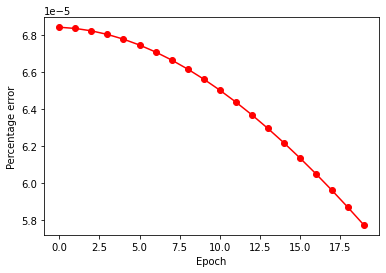

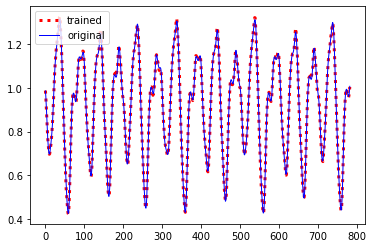

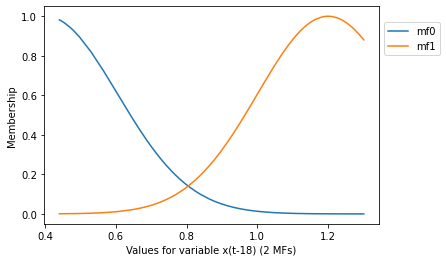

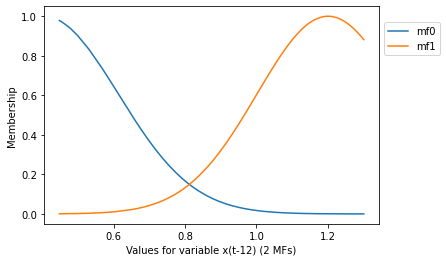

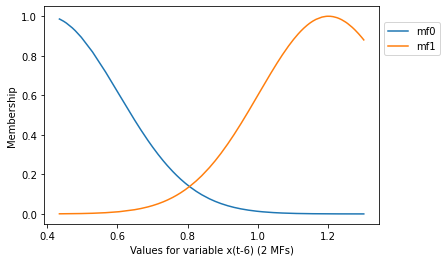

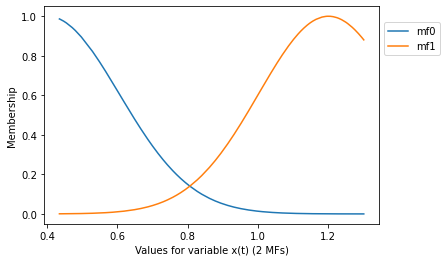

### Testing for 195 cases
MS error=0.00007, RMS error=0.00823, percentage=0.64%


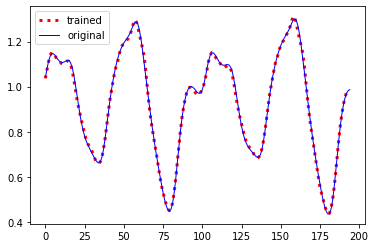

In [6]:
if __name__ == '__main__':
    model = model()
    train_data = data(partition = 'train')
    train_anfis(model, data = train_data, epochs = 20, show_plots = True)
    test_data = data(partition = 'test')
    test_anfis(model, data = test_data, show_plots = True)